In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} numpy

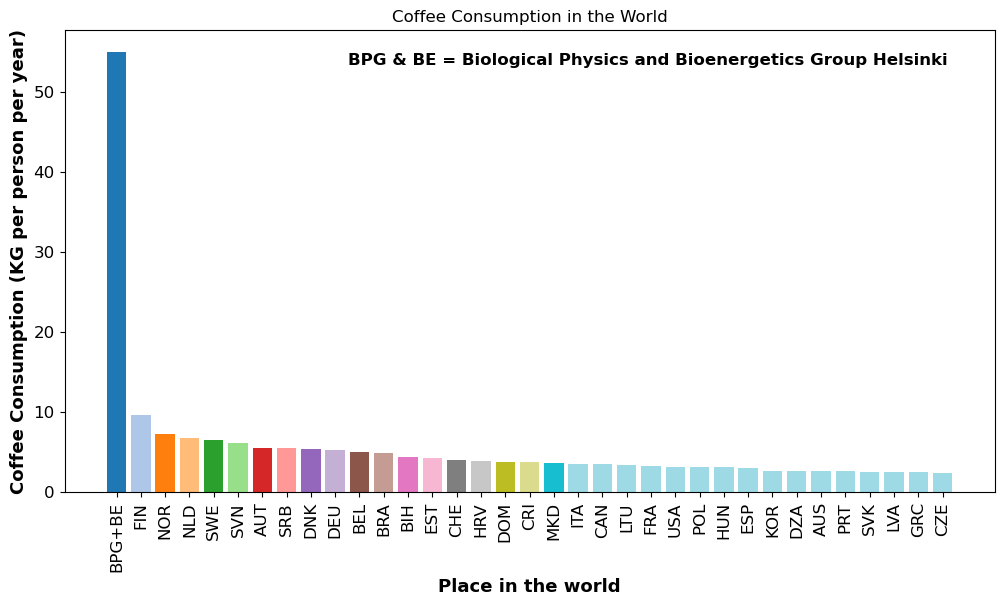

In [20]:
import matplotlib.pyplot as plt

countries = [
    'BPG+BE', 'FIN', 'NOR', 'NLD', 'SWE', 'SVN', 'AUT', 'SRB', 'DNK', 'DEU', 'BEL',
    'BRA', 'BIH', 'EST', 'CHE', 'HRV', 'DOM', 'CRI', 'MKD', 'ITA', 'CAN',
    'LTU', 'FRA', 'USA', 'POL', 'HUN', 'ESP', 'KOR', 'DZA', 'AUS', 'PRT',
    'SVK', 'LVA', 'GRC', 'CZE'
]

coffee_consumption = [
    55, 9.6, 7.2, 6.7, 6.5, 6.1, 5.5, 5.4, 5.3, 5.2, 4.9, 4.8, 4.3, 4.2, 3.9,
    3.8, 3.7, 3.7, 3.6, 3.4, 3.4, 3.3, 3.2, 3.1, 3.1, 3.1, 3.0, 2.6, 2.6,
    2.6, 2.6, 2.5, 2.5, 2.4, 2.3
]

# Generate a list of unique colors for each bar
colors = plt.cm.tab20(range(len(countries)))

plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the bar chart with different colors
plt.bar(countries, coffee_consumption, color=colors)

# Add the value "BPG+BE" in bold with a consumption of 55
#plt.text(countries.index('BEL'), 55, 'BPG+BE',)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adding labels and title
plt.xlabel('Place in the world', fontsize=13, fontweight='bold')
plt.ylabel('Coffee Consumption (KG per person per year)', fontsize=13, fontweight='bold')
plt.title('Coffee Consumption in the World')

# Add text in the top right of the graph
text = 'BPG & BE = Biological Physics and Bioenergetics Group Helsinki'
plt.text(0.95, 0.95, text,fontsize=12, fontweight='bold', ha='right', va='top', transform=plt.gca().transAxes)

# Displaying the plot
plt.show()


In [2]:
import numpy as np

In [3]:
import scipy

In [1]:
import nglview
view = nglview.show_pdbid("3pqr") 
view

NGLWidget()

In [ ]:
#RMSF
## gmx rmsf -s production.tpr -f production.xtc -n ../index.ndx -o rmsf.xvg -fit -res
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('rmsf.xvg')


x = data[:, 0]
y = data[:, 1]
plt.plot(x, y)
plt.xlabel('Residues')
plt.ylabel('Distance in nm')
plt.title('RMSF Calpha')
plt.savefig('plot.png', bbox_inches='tight')
plt.show()

In [1]:
import os

In [2]:
os.system("pwd")

/home/local/matspunt/Documents/notebooks


0

## Some approximation of configurational convergence

/tmp/ipykernel_4617/3052754736.py:56: UserWarning: Matplotlib is currently using module://ipympl.backend_nbagg, which is a non-GUI backend, so cannot show the figure.
  fig.show()


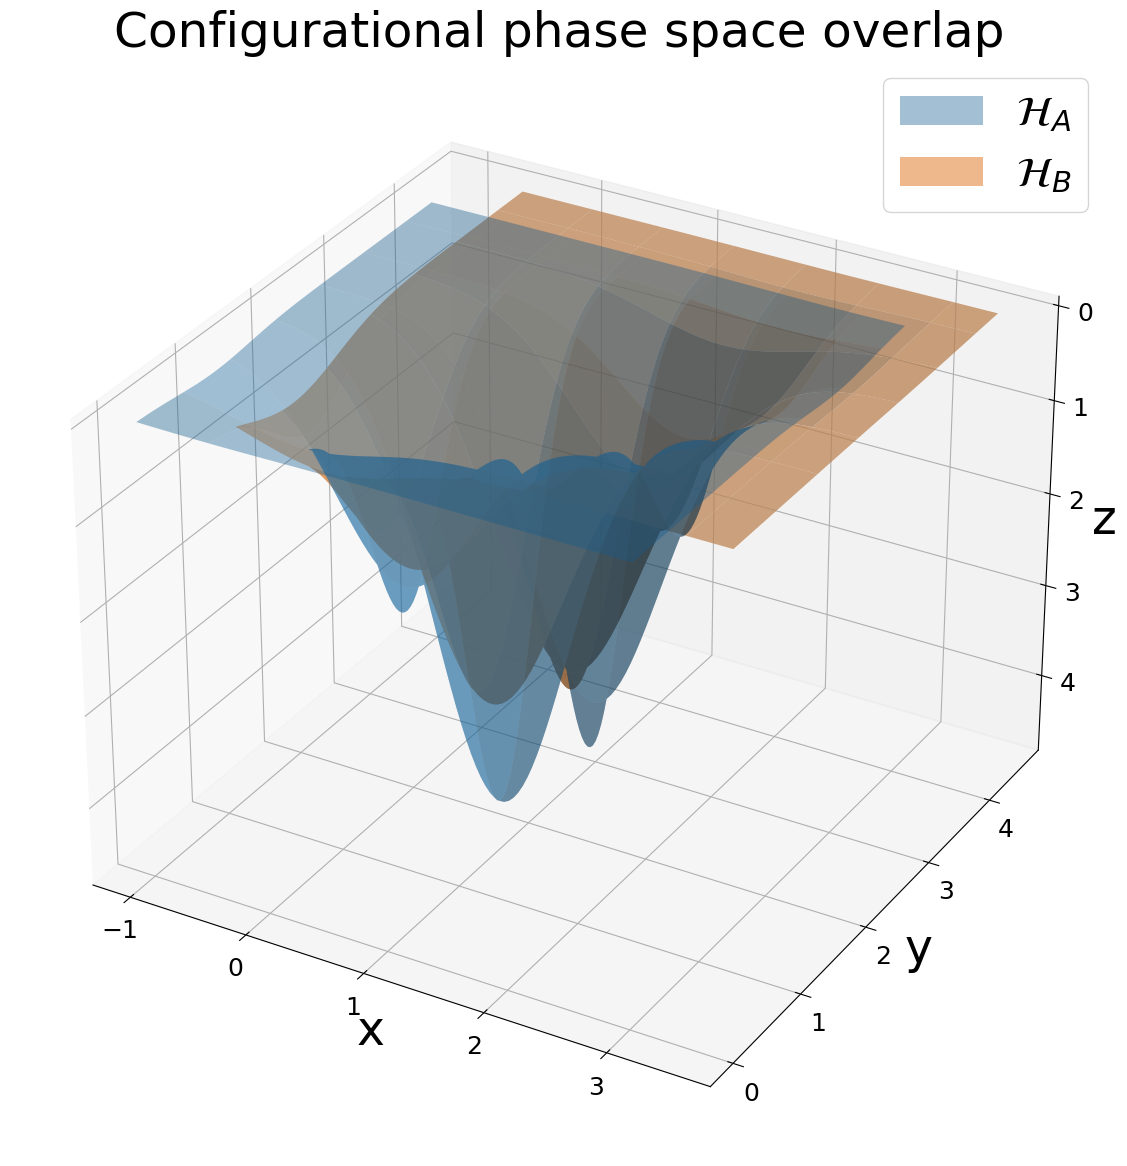

In [173]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

plt.rcParams.update({'font.size': 18})
 
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
 
#####First graph
x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([1, 2])
cov = np.array([[.5, .25],[.25, .35]])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)*10
c1 = ax.plot_surface(X, Y, Z, alpha=0.4, linewidth=0, antialiased=True, rstride=15, cstride=15, label="${\cal H}_{A}$")
ax.invert_zaxis()
 
#fix for legend bug
c1._facecolors2d = c1._facecolor3d
c1._edgecolors2d = c1._edgecolor3d
 
#####Second graph, slightly displaced
a = np.linspace(-0.5, 3.5, 100)
b = np.linspace(0.5, 4.5, 100)
A, B = np.meshgrid(a, b)
pos = np.dstack((A, B))
mu = np.array([1, 2])
cov = np.array([[.5, .25],[.25, .5]])
rv = multivariate_normal(mu, cov)
C = rv.pdf(pos)*10
c2 = ax.plot_surface(A, B, C, color='sandybrown', alpha=0.7, linewidth=0, antialiased=True, rstride=15, cstride=15, label = "${\cal H}_{B}$")
 
#fix for legend bug
c2._facecolors2d = c2._facecolor3d
c2._edgecolors2d = c2._edgecolor3d
 
ax.set_title("Configurational phase space overlap", fontsize=35)
ax.set_xlabel("x", fontsize=34)
ax.set_ylabel("y", fontsize=34)
ax.set_zlabel("z", fontsize=34)
 
fig.tight_layout() #fix clipping labels
 
#customize gridlines
ax.set_facecolor('#FFFFFF')
[ax.spines[side].set_visible(False) for side in ax.spines]
ax.grid(which='major', color='white', linewidth=1.2)
 
ax.legend(fontsize=30)#show legend
 
fig.show()

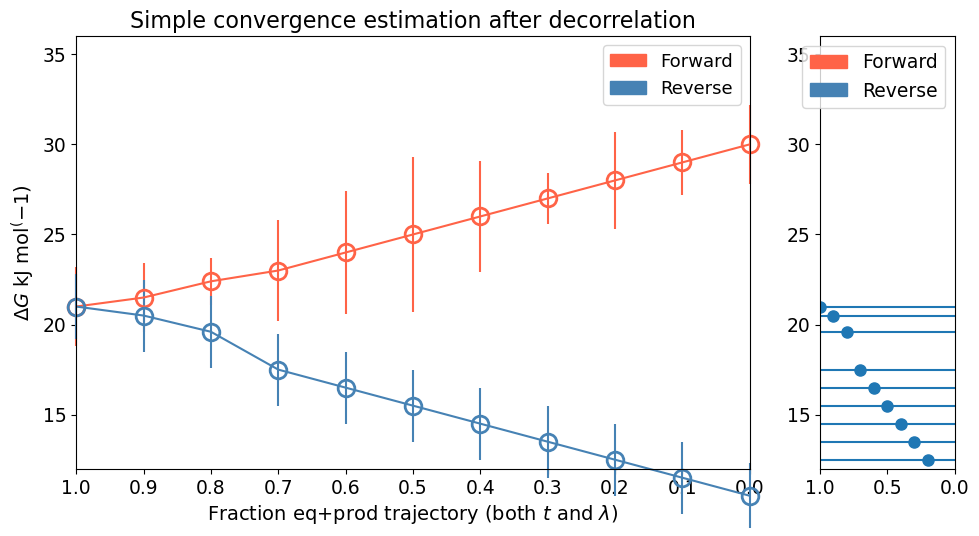

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 13.5})
# example data
x1 = np.linspace(0.0, 1.0, num=11)
y1 = np.array([30, 29, 28, 27, 26, 25, 24, 23, 22.4, 21.5, 21])
y2 = np.array([10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 19.6, 20.5, 21])
error1 = np.array([2.2,1.8, 2.7, 1.4, 3.1, 4.3, 3.4, 2.8, 1.3, 1.9, 2.2])
error2 = np.array([1.8,2, 2, 2, 2, 2, 2, 2, 2, 2, 1.8])

#fig, (ax0, ax1) = plt.subplots(dpi=100, ncols=2, sharex=True, figsize=(8,4))
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(10,6))

#fig.suptitle('Simple convergence estimation after decorrelation', fontweight="bold", fontsize = 16)
ax0.errorbar(x1, y1, yerr=error1, fmt='-o', markersize=12, capsize=0, label = "Forward", clip_on=False, markeredgewidth = 2, color = 'tomato', fillstyle='none')
ax0.errorbar(x2, y2, yerr=error2, fmt='-o', markersize=12, capsize=0, label = "Reverse", clip_on=False, markeredgewidth = 2, color='steelblue', fillstyle='none')
ax0.invert_xaxis() 
ax0.set_title("Simple convergence estimation after decorrelation", fontsize=16)
ax0.set_xlabel("Fraction eq+prod trajectory (both $t$ and $\lambda$)", fontsize=14)
ax0.set_ylabel("$\Delta G$ kJ mol$^(-1)$", fontsize=14)
ax0.set_ylim([12, 36])
ax0.set_xlim([1, 0])
ax0.margins(y=.1, x=.1)
ax0.set_xticks(ax0.get_xticks()[::1])
ax0.legend(fontsize=13)#show legend
red_patch = mpatches.Patch(color='tomato', label='Forward')
blue_patch = mpatches.Patch(color='steelblue', label='Reverse')
ax0.legend(fontsize=13, handles=[red_patch, blue_patch])

plt.legend(handles=[red_patch, blue_patch])

loc = plticker.MultipleLocator(base=0.1) # this locator puts ticks at regular intervals
ax0.xaxis.set_major_locator(loc)


ax1.errorbar(x2, y2, xerr=error2, fmt='o', markersize=8, capsize=8)
ax1.set_ylim([12, 36])
ax1.set_xlim([1, 0])

fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()


In [106]:
print(x2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [96]:
len(y1)

13